Estudiante 1: Juan José Guzmán Mejía

Estudiante 2: Jhon Alex Montealegre

----

# Departamento de Ingeniería Mecánica
## IMEC 2001 - Herramientas Computacionales
### Taller 3 - Sistemas de Ecuaciones Ordinarias
----
### **<span style="color:#A1CCD1;">Condiciones de la entrega </span>**
----
**1. Fechas de entrega:**
- Nota sobre 5.00 ->  <span style="color:red;">1 de Octubre a las 23:59, 2023</span>

**2. Colocar el nombre de los integrantes en la casilla correspondiente<br>**
**3. La entrega del taller es por Bloque Neon y se envía el archivo en formato de Jupyter Notebook (extensión `.ipynb`)<br>**
**4. El nombre del archivo debe ser:**
- Si trabajó en parejas:`T#_ApellidosIntegrante1_ApellidosIntegrante2` (Ej: `T#_Salamanca_VargasTorres`)
- Si trabajó individual: `T#_Apellido` (Ej: `T#_VargasTorres`)

**5. Comente el código con el proceso que realizó para llegar a la solución.<br>**
**6. <span style="color:red;"> Si se detecta copia con otro de los talleres enviados, automáticamente la nota para los grupos involucrados es 0. </span>**





<a id="exercise3"></a>
## <font color="#276C9B"> Actividad 1  </font>

En los sistemas dinámicos bidimensionales para algunos casos se tienen los ciclos límite los cuales son una trayectoria cerrada en el espacio. A continuación tiene las ecuaciones de las que debe encontrar la solución para $x$ y $y$:

$$y = - x' + x(1-x^2-y^2)$$
$$-x = -y' + y(1-x^2-y^2)$$

El ejercicio que debe realizar consta de los siguientes pasos:
1. Reescriba la ecuación para que se exprese la primera derivada en términos de x y y.
3. Especifique como condiciones iniciales:
- x(0) = 0
- y(0) = 1
4. Especifique el tiempo en el que se va a estudiar la respuesta.
4. Solucione el sistema ode.
5. Debe realizar una gráfica interactiva teniendo en cuenta la solución encontrada en el literal anterior. Para esto utilice la siguiente función (lo que se encuentra comentado debe completarlo):

```Python
def f(alpha, t):
    tiempo = # Completar
    sol = # Completar
    
    w = 3
    x = np.linspace(-w, w, 101)
    y = np.linspace(-w, w, 101)
    # full coordinate arrays
    X, Y = np.meshgrid(x, y)
    U = alpha*X - alpha*(X**2 + Y**2)*X - Y
    V = alpha*Y - alpha*(X**2 + Y**2)*Y + X
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(# Completar con la solución encontrada)
    ax.streamplot(X,Y,U,V)

    formato_grafica(# Completar)
 ```
Para poder desplegar la gráfica utilice la siguiente línea de código:
```Python
 interact(f, alpha=(0, 1, 0.1), t=(0, 'Completar', 0.1))
 ```

$$x' = - y + x(1-x^2-y^2)$$
$$ y' = x + y(1-x^2-y^2)$$


In [1]:
import numpy as np

In [2]:
def ode(variables, t):
    # Variables
    x = variables[0]
    y = variables[1]

    # Ecuaciones
    dx_dt = -y + x*(1-x**2-y**2)
    dy_dt = x + y*(1-x**2-y**2)

    return [dx_dt, dy_dt]

In [3]:
condiciones_iniciales = [0, 1] # [x0, y0]
condiciones_iniciales

[0, 1]

In [4]:
start = 0
stop = 10
num = 50

In [5]:
tiempo = np.linspace(start, stop, num)
tiempo

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [33]:
import scipy
sol = scipy.integrate.odeint(func=ode,
                       y0=condiciones_iniciales,
                       t=tiempo)

In [34]:
import matplotlib.pyplot as plt

def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)

    if leyenda == True:
        plt.legend(loc='best')

    plt.tight_layout;

def f(alpha, t):
    w = 3
    x = np.linspace(-w, w, 101)
    y = np.linspace(-w, w, 101)
    # full coordinate arrays
    X, Y = np.meshgrid(x, y)
    U = alpha*X - alpha*(X**2 + Y**2)*X - Y
    V = alpha*Y - alpha*(X**2 + Y**2)*Y + X

    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(sol[:,0],sol[:,1])
    ax.streamplot(X,Y,U,V)

    formato_grafica(titulo='Comportamiento ODE',
                ejex='Tiempo ($t$)',
                ejey='$x(t)$',
                leyenda=False)

In [30]:
!pip install ipywidgets

In [31]:
import ipywidgets

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), FloatSlider(value=5.0, description…

<function __main__.f(alpha, t)>

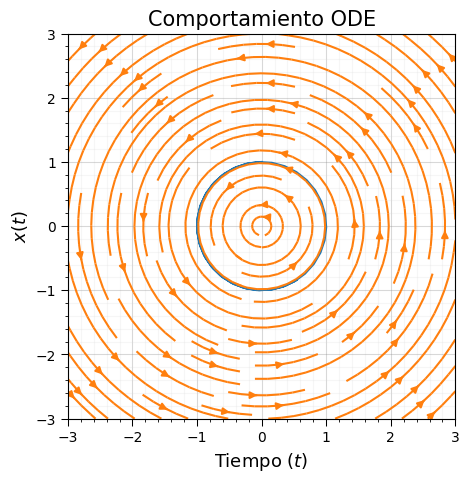

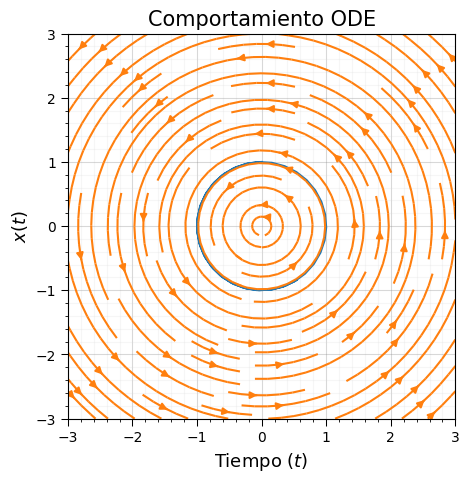

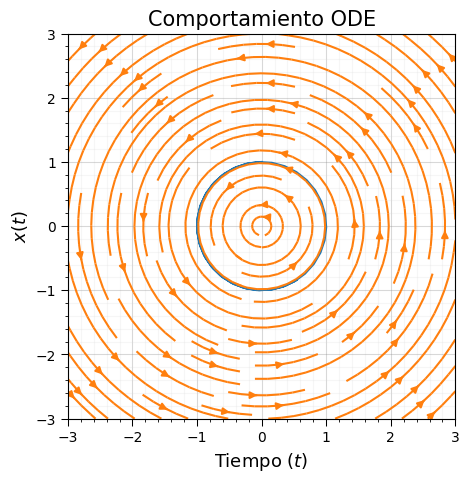

In [32]:
ipywidgets.interact(f, alpha=(0, 1, 0.1), t=(0, 10, 0.1))

1. Varie $\alpha$ tres veces y comente los resultados.
2. Varie el tiempo y comente lo que observa.